## CIFAR 100 Classification

# Stage 1: Create Dataset and Dataloader

In this case we are going to develop a cifar 100 classification problem, for that we a re going to use the cifar100 dataset availablwe in torchvision, Although we are going to apply data augmentation for make the neuronal network more robust, and batch size of 64

For this time i will use 32x32 size images, as it is the cifar100 size images, so all the images will be resized to 32 x 32. alltought

In [1]:
import torch,os
from torchvision import datasets, transforms
from torch.utils.data import random_split, ConcatDataset, DataLoader


transform = transforms.Compose([
    transforms.Resize((32,32)),  # Resizes the image to 32x32
    transforms.ToTensor(),  # Converts the image into a tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the tensors (mean and std deviation for 3 color channels)
])

# Create Train dataset
train_dataset = datasets.CIFAR100(root = './dataset/train',download=True, train=True, transform=transform)
# Create Test dataset
test_dataset = datasets.CIFAR100(root = './dataset/test',download=True, train=False, transform=transform) 

#Create train loader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
#Create test loader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


# Stage 2: building neural network model

Stride: The stride refers to how many pixels the filter moves through the image or input volume at each step during the convolution operation. A stride of 1 means that the filter moves one pixel at a time. A stride of 2 means that the filter moves two pixels at a time, and so on. A larger stride will result in a lower spatial dimension output.

Padding: Padding refers to the addition of extra pixels around the input image or volume before applying the convolution operation. The purpose of padding is to control the spatial dimension of the output. It is especially useful when you want to keep the spatial dimensions of the input and output the same after the convolution operation.

For this time i will use 4 convolutional layer, letting to the network learn more complex forms

You start with 32x32 images.

Each time you apply a pooling layer with a kernel size of 2 and a stride of 2, you halve the height and width dimensions of the image. Since you have 4 pooling layers, the image dimension is reduced to 32 / (2^4) = 2 (rounding down if necessary).

The last convolutional layer has 256 output channels. Therefore, the output of the last convolutional layer is a tensor of dimension [256, 2, 2].

When you flatten this tensor to feed the fully connected layer, you get a vector of length 256 * 2 * 2 = 1024.

The number 500 in the fully connected layer is the number of neurons (or nodes) in that layer. This is a hyperparameter that you can adjust. Like other hyperparameters, the best value may depend on your specific data set and may require a bit of experimentation to find

In [2]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Convolutional layers
        # First conv layer: input channels = 3 (RGB), output channels = 32
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        # Second conv layer: input channels = 32 (from previous layer), output channels = 64
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        # Third conv layer: input channels = 64 (from previous layer), output channels = 128
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        # Fourth conv layer: input channels = 128 (from previous layer), output channels = 256
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)

        # Max pooling layer with kernel size 2 and stride 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Dropout layer
        self.dropout = nn.Dropout(0.4)

        # Fully connected layers
        # First FC layer, input size should match the output size of the last conv layer
        self.fc1 = nn.Linear(256 * 2 * 2, 500)  # Adjusting to correct size after applying conv and pooling layers
        # Second FC layer, output size is the same as the number of classes
        self.fc2 = nn.Linear(500, 100)

    def forward(self, x):
        # Apply first conv layer, followed by ReLU, then max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second conv layer, followed by ReLU, then max pooling
        x = self.pool(F.relu(self.conv2(x)))
        # Apply third conv layer, followed by ReLU, then max pooling
        x = self.pool(F.relu(self.conv3(x)))
        # Apply fourth conv layer, followed by ReLU, then max pooling
        x = self.pool(F.relu(self.conv4(x)))
        # Flatten the tensor output from the conv layers
        x = x.view(-1, 256 * 2 * 2)  # Adjusting to correct size after applying conv and pooling layers
        # Apply first FC layer with ReLU after applying dropout
        x = F.relu(self.fc1(self.dropout(x)))
        # Apply second FC layer after applying dropout
        x = self.fc2(self.dropout(x))
        return x


# Stage 3: Train model

For this, we need to define a loss function and an optimiser. We will use Cross Entropy as our loss function, as it is a good choice for classification problems. For the optimiser, we will use Adam.

Furthermore, we will divide our dataset into a training set and a validation set. During each epoch, we will train the model on the training set and then evaluate it on the validation set. If the performance on the validation set improves, we will save the model.

Since I found that the model stagnated and did not keep improving, I opted to reduce LR and increase the dropdown.


It is using: cuda
Previous mode was loaded.


Epoch 1:   0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1: 100%|██████████| 391/391 [00:15<00:00, 25.87it/s, training_loss=0.972]


              precision    recall  f1-score   support

     class_0       0.79      0.74      0.76       100
     class_1       0.63      0.70      0.66       100
     class_2       0.44      0.41      0.42       100
     class_3       0.40      0.34      0.37       100
     class_4       0.32      0.32      0.32       100
     class_5       0.50      0.51      0.50       100
     class_6       0.54      0.60      0.57       100
     class_7       0.57      0.58      0.58       100
     class_8       0.62      0.63      0.62       100
     class_9       0.69      0.71      0.70       100
    class_10       0.43      0.34      0.38       100
    class_11       0.41      0.36      0.39       100
    class_12       0.52      0.58      0.55       100
    class_13       0.47      0.41      0.44       100
    class_14       0.44      0.43      0.43       100
    class_15       0.44      0.39      0.41       100
    class_16       0.61      0.57      0.59       100
    class_17       0.75    

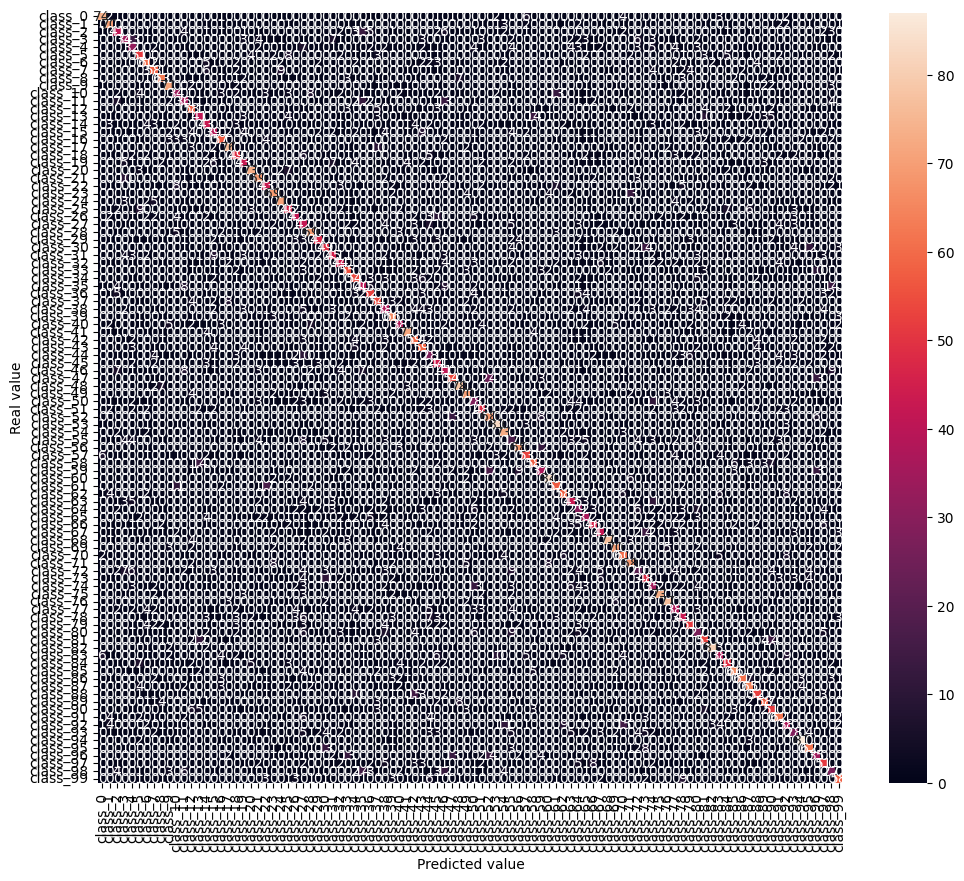

Epoch 1, Validation Loss: 1.7910264579555657
El loss actual es 1.7910264579555657 y el mejor es 1.7976266884575256
model saved
Finished Training


In [4]:
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
from torchvision import transforms
from tqdm import tqdm
import torch

# Try to use cuda if posible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("It is using: " + device.type)

# Initialice the network
model = Net().to(device)

# Path to save the model
model_path = 'best_model_v3.pth'
if os.path.exists(model_path):
    print("Previous mode was loaded.")
    model = Net()
    model.load_state_dict(torch.load(model_path))
    model.to(device)
    
else:
    print("Not previous model found.")
    model = Net().to(device)
    
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)  # L2 regularization

# Define a number of training epochs
epochs = 1

#actually is my best
best_loss = 50

best_val_loss = 1.7976266884575256  # Initialize with a high value

# Training loop
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that we have 100 classes for the CIFAR-100 dataset
class_names = [f'class_{i}' for i in range(100)]

for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Create a progress bar
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}')
    
    for inputs, labels in progress_bar:
        # Move data to the GPU if available
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'training_loss': loss.item()})

    # Initialize lists to store predictions and labels
    all_preds = []
    all_labels = []

    # Set the model to evaluation mode
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move data to the GPU if available
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Update the validation loss
            val_loss += loss.item()

            # Get predictions
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate and print accuracy, recall, and F1-score
   
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Calculate and print confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt="d", 
                xticklabels=class_names, yticklabels=class_names)
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    
    # Print epoch loss
    print(f'Epoch {epoch+1}, Validation Loss: {val_loss/len(test_loader)}')

    # Save the model if it has the best validation loss so far
    print(f'El loss actual es {val_loss/len(test_loader)} y el mejor es {best_val_loss}')
    if val_loss/len(test_loader) < best_val_loss:
        print("model saved")
        best_val_loss = val_loss/len(test_loader)
        torch.save(model.state_dict(), 'best_model_v3.pth')

print('Finished Training')

# Stage 4 my own tests

As you can see below, the neuronal network still neading more epochs for improve its results

In [ ]:
import pickle
# Load the saved model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("It is using: " + device.type)
model = Net().to(device)
model.load_state_dict(torch.load('best_model_v3.pth'))

# Set the model to evaluation mode
model.eval()

# Get a batch of validation data
inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(inputs)

probabilities = torch.exp(outputs)

# The outputs are probabilities for each class. To get the predicted class, we take the index of the highest probability.
_, preds = torch.max(probabilities, 1)

# Cargando las etiquetas de CIFAR-100
with open('./dataset/train/cifar-100-python/meta', 'rb') as file:
    data = pickle.load(file, encoding='bytes')
    fine_label_names = [t.decode('utf8') for t in data[b'fine_label_names']]

# Utilizando las etiquetas para imprimir las clases predichas
print('Predicted:', [fine_label_names[i] for i in preds])
print('True:     ', [fine_label_names[i] for i in labels])


It is using: cuda


FileNotFoundError: [Errno 2] No such file or directory: 'best_model_v3.pth'

# Stage 5: Create server

In [ ]:
from flask import Flask, request, jsonify
from werkzeug.exceptions import BadRequest
from PIL import Image
from io import BytesIO
from flask_cors import CORS

app = Flask(__name__)
CORS(app)
# Load the saved model
model = Net().to(device)
model.load_state_dict(torch.load('best_model_v3.pth'))

import torch
import pickle
import torch.nn.functional as F

def load_labels(label_file='./dataset/train/cifar-100-python/meta'):
    with open(label_file, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
        fine_label_names = [t.decode('utf8') for t in data[b'fine_label_names']]
    return fine_label_names
from PIL import Image
from io import BytesIO
import torch
from torchvision import transforms

# Define transformation
def make_predict(image, model, device, label_names):
    # Ensure model is in eval mode
    model.eval()

    # Move image and labels to device
    image = image.to(device)

    # Make prediction
    with torch.no_grad():
        output = model(image)

    probabilities = F.softmax(output, dim=1)
    _, preds = torch.max(probabilities, 1)

    # Translate preds to class names
    pred_classes = [label_names[i] for i in preds]
    
    return pred_classes

def transform_image(image):
    return transform(image).unsqueeze(0)

def predict_image(model, image):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    image = transform_image(image).to(device)
    label_names = load_labels()
    return make_predict(image, model, device, label_names)

@app.route('/predict/cifar100', methods=['POST'])
def predict():
    if 'image' not in request.files:
        raise BadRequest('No image file in the request')

    file = request.files['image']
    image = Image.open(BytesIO(file.read()))
    prediction = predict_image(model, image)

    result = {
        'prediction': prediction
    }
    return result

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5003)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5003
 * Running on http://192.168.1.20:5003
Press CTRL+C to quit
